This notebook is dedicated to understanding the data and precapre the input for the model according to the dataset and the desired putput.

---

In [1]:
import torch
from PIL import Image
from model import end_to_end

model = end_to_end()
model.eval()

end_to_end(
  (enc_conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc_bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc_bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc_bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc_bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc_bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc_bn6): BatchNorm2d(256

In [4]:
filename = '/Users/farida/Documents/subtract-model/clothing-co-parsing/photos/0001.jpg'
import matplotlib.pyplot as plt
from torchvision import transforms
import matplotlib.image as mpimg
import torch.nn.functional as F

input_image = mpimg.imread(filename)
print(input_image.shape)
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

with torch.no_grad():
    output = model(input_batch)[0]
output_predictions = output.softmax(0)

(832, 550, 3)


In [5]:
print(output_predictions)

tensor([[[0.4956, 0.4958, 0.4954,  ..., 0.4955, 0.4955, 0.4958],
         [0.4953, 0.4960, 0.4954,  ..., 0.4960, 0.4959, 0.4957],
         [0.4956, 0.4960, 0.4960,  ..., 0.4956, 0.4959, 0.4955],
         ...,
         [0.4950, 0.4960, 0.4952,  ..., 0.4959, 0.4955, 0.4959],
         [0.4953, 0.4960, 0.4960,  ..., 0.4957, 0.4964, 0.4958],
         [0.4954, 0.4956, 0.4952,  ..., 0.4958, 0.4953, 0.4944]],

        [[0.5044, 0.5042, 0.5046,  ..., 0.5045, 0.5045, 0.5042],
         [0.5047, 0.5040, 0.5046,  ..., 0.5040, 0.5041, 0.5043],
         [0.5044, 0.5040, 0.5040,  ..., 0.5044, 0.5041, 0.5045],
         ...,
         [0.5050, 0.5040, 0.5048,  ..., 0.5041, 0.5045, 0.5041],
         [0.5047, 0.5040, 0.5040,  ..., 0.5043, 0.5036, 0.5042],
         [0.5046, 0.5044, 0.5048,  ..., 0.5042, 0.5047, 0.5056]]])


In [6]:
print(output)

tensor([[[0.4912, 0.4915, 0.4909,  ..., 0.4911, 0.4911, 0.4916],
         [0.4907, 0.4919, 0.4909,  ..., 0.4921, 0.4918, 0.4914],
         [0.4911, 0.4920, 0.4920,  ..., 0.4911, 0.4918, 0.4911],
         ...,
         [0.4900, 0.4921, 0.4904,  ..., 0.4919, 0.4910, 0.4917],
         [0.4906, 0.4920, 0.4921,  ..., 0.4915, 0.4928, 0.4915],
         [0.4909, 0.4911, 0.4903,  ..., 0.4916, 0.4905, 0.4887]],

        [[0.5088, 0.5085, 0.5091,  ..., 0.5089, 0.5089, 0.5084],
         [0.5093, 0.5081, 0.5091,  ..., 0.5079, 0.5082, 0.5086],
         [0.5089, 0.5080, 0.5080,  ..., 0.5089, 0.5082, 0.5089],
         ...,
         [0.5100, 0.5079, 0.5096,  ..., 0.5081, 0.5090, 0.5083],
         [0.5094, 0.5080, 0.5079,  ..., 0.5085, 0.5072, 0.5085],
         [0.5091, 0.5089, 0.5097,  ..., 0.5084, 0.5095, 0.5113]]])


torch.Size([2, 224, 224])


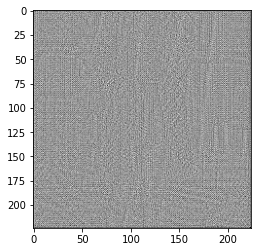

In [8]:
print(output_predictions.shape)
plt.imshow(output_predictions[0], cmap='gray')